In [5]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
cond = df['Species'].isin(['Bream', 'Smelt'])

In [7]:
fish_data = df.loc[cond, ['Length2', 'Weight']]

In [8]:
fish_target = df.loc[cond, ['Species']]

In [9]:
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [10]:
fish_target.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [11]:
#자동으로 test, train 개수 나눠주는 함수 사용

from sklearn.model_selection import train_test_split

In [12]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=40)     

#train_test_split(arr 여러개 입력 필요- shape 같아야함, ..random=None, shuffle=None 등등..)
#train_input/test_input, trian_target/test_target 총 4개 데이터가 들어있는 리스트 제공
#a, b, c, d = [0, 1, 2, 3]
#random_state -> 고정값 생성
#stratify -> 클래스 분포 비율 맞춰줌

In [13]:
train_target

,Species
149,Smelt
156,Smelt
32,Bream
154,Smelt
152,Smelt
20,Bream
10,Bream
145,Smelt
26,Bream
9,Bream


In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
kn = KNeighborsClassifier()

In [16]:
kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [17]:
kn.score(test_input, test_target)

1.0

In [18]:
kn.predict([[50, 300]])

C:\Users\2-15\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

In [19]:
kn.predict([[25, 150]])

C:\Users\2-15\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

In [20]:
import matplotlib.pyplot as plt

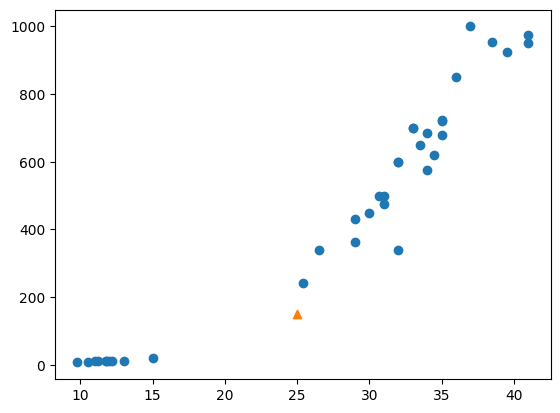

In [21]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^')
plt.show()

In [28]:
kn.kneighbors([[25, 150]])

C:\Users\2-15\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.48375378, 138.32150953, 138.39320793,
         140.62090883]]),
 array([[23, 31,  1,  3, 10]]))

In [29]:
distance, indexes = kn.kneighbors([[25, 150]])

C:\Users\2-15\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [30]:
indexes

array([[23, 31,  1,  3, 10]])

In [31]:
n_df = train_input.iloc[indexes[0]]

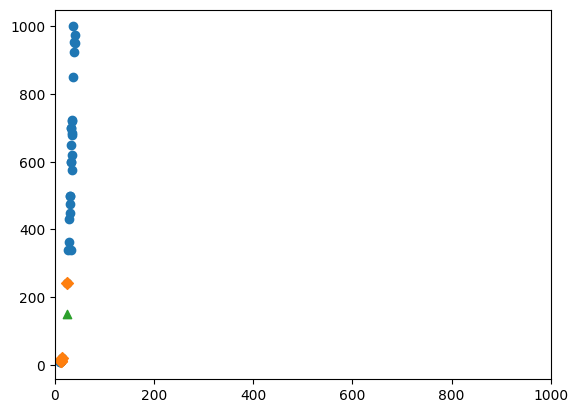

In [32]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(n_df['Length2'], n_df['Weight'], marker='D')
plt.scatter(25, 150, marker='^')
plt.xlim(0, 1000)
plt.show()

- 표준점수

```
  (데이터) - (평균) / 표준편차
```

In [33]:
#표준점수(Z점수) - 내 점수와 평균 비교

mean = train_input.mean()   #평균

In [34]:
std = train_input.std()  #표준편차

In [35]:
train_input.head()

,Length2,Weight
149,11.2,9.8
156,13.0,12.2
32,39.5,925.0
154,12.2,12.2
152,11.8,9.9


In [36]:
(train_input - mean).head()

,Length2,Weight
149,-16.213889,-452.913889
156,-14.413889,-450.513889
32,12.086111,462.286111
154,-15.213889,-450.513889
152,-15.613889,-452.813889


In [37]:
#최종 공식

train_scaled = ((train_input - mean) / std)

In [38]:
#물어보고자 하는 데이터도 표준점수로 바꿔야함

new = ([25, 150] - mean) / std
new

Length2   -0.232394
Weight    -0.926813
dtype: float64

In [39]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [40]:
test_scaled = (test_input - mean) / std  #여기서 mean, std => train data 기준
kn.score(test_scaled, test_target)

1.0

In [41]:
kn.predict([new])

C:\Users\2-15\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

## 펭귄데이터 연습

In [101]:
import seaborn as sns

In [102]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [104]:
df = df.dropna() #nan 값 삭제

In [105]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [106]:
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [107]:
df.groupby('species').mean(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


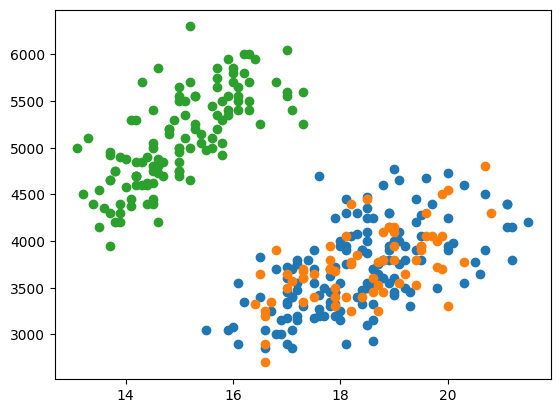

In [108]:
import matplotlib.pyplot as plt

cond_adel = df['species'] == 'Adelie'
cond_chin = df['species'] == 'Chinstrap'
cond_gent = df['species'] == 'Gentoo'

plt.scatter(df.loc[cond_adel, 'bill_depth_mm'], df.loc[cond_adel, 'body_mass_g'])
plt.scatter(df.loc[cond_chin, 'bill_depth_mm'], df.loc[cond_chin, 'body_mass_g'])
plt.scatter(df.loc[cond_gent, 'bill_depth_mm'], df.loc[cond_gent, 'body_mass_g'])

In [109]:
cond = df['species'].isin(['Adelie', 'Gentoo'])

In [110]:
pg_data = df.loc[cond, ['flipper_length_mm', 'bill_length_mm']]

In [111]:
pg_target = df.loc[cond, ['species']]

In [112]:
pg_data.head()

,flipper_length_mm,bill_length_mm
0,181.0,39.1
1,186.0,39.5
2,195.0,40.3
4,193.0,36.7
5,190.0,39.3


In [113]:
#pg_data = pg_data.fillna(pg_data.mean()) -> dropna() 안 해줬으면 nan 값 평균으로 채워주기

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
train_input, test_input, train_target, test_target = train_test_split(pg_data, pg_target, stratify=pg_target)

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
kn = KNeighborsClassifier()

In [118]:
kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

In [119]:
kn.score(test_input, test_target['species'])

1.0

In [120]:
mean = train_input.mean()
std = train_input.std()

train_scaled = ((train_input - mean) / std)
new = ([205, 50] - mean) / std

In [121]:
kn.fit(train_scaled, train_target['species'])

KNeighborsClassifier()

In [127]:
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target['species'])

1.0

In [123]:
import matplotlib.pyplot as plt

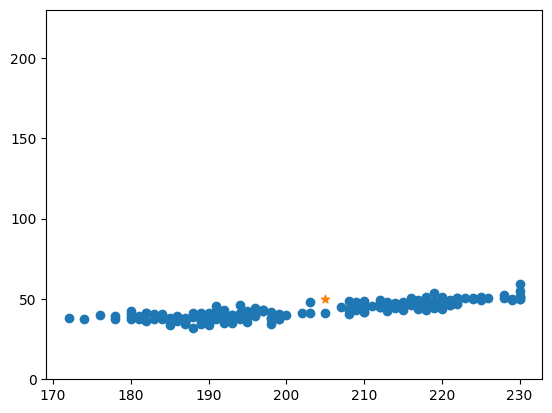

In [124]:
plt.scatter(train_input['flipper_length_mm'], train_input['bill_length_mm'])
plt.scatter(205, 50, marker='*')
plt.ylim(0, 230)
plt.show()

In [125]:
kn.kneighbors([[205, 50]])

C:\Users\2-15\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[208.47144823, 208.6677822 , 208.8005723 , 208.82731249,
         208.89442831]]),
 array([[164,  15, 195,  79, 126]]))

In [126]:
kn.predict([new])

C:\Users\2-15\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Gentoo'], dtype=object)